# Early Stage Diabetes Risk Prediction via different Machine Learning Approaches
###### By [Yuvraj Dagur](https://github.com/thatfreakcoder)

The dataset used here is the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) Dataset name [Early Stage Diabetes Risk Prediction Dataset](https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset) and can be downloaded from [Here](https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset).

### Importing Helper Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *
%matplotlib inline


### Storing Dataset in Pandas DataFrame and exploring it

In [34]:
dataset = 'Dataset\\diabetes_data_upload.csv'
df = pd.read_csv(dataset)

print(f"Dataset Contains {df.shape[0]} Lines of data\nWith {df.shape[1]} Columns\n")
print("Columns in the Dataset :\n" , [col for col in df.columns])

df.head()

Dataset Contains 520 Lines of data
With 17 Columns

Columns in the Dataset :
 ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### Applying Label Encoding to Encode Data

In [35]:
from sklearn.preprocessing import LabelEncoder as le
columns = df.columns[1:]
for label in columns:
    df[label] = le().fit_transform(df[label])

df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### Performing `train_test_split` on the Dataset
We First need to Split data into **Features** and **Labels**

We then apply an **80% Test Split** 

In [37]:
from sklearn.model_selection import train_test_split

features = df.drop(['class'], axis='columns')
labels = df['class']

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.8, shuffle=True, random_state=50)

print(f'Training Set : {train_features.shape[0]}')
print(f'Testing Set : {test_features.shape[0]} ')

Training Set : 104
Testing Set : 416 


### Listing All the Models and Their `best_test_accuracy` for Model Comparision

In [38]:
models = ["K-Nearest Neighbors", "Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Machine"]
best_test_accuracy = []

# Model 1 : K-Nearest Neighbors


Testing different Neighbors for K-Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [n for n in range(1, 11)]
train_acc = []
test_acc = []

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(train_features, train_labels)
    
#   recording accuracy 
    train_acc.append(knn.score(train_features, train_labels))
    test_acc.append(knn.score(test_features, test_labels))

Plotting Best Neighbor

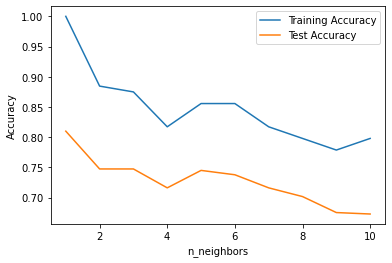

In [40]:
plt.plot(neighbors, train_acc, label="Training Accuracy")
plt.plot(neighbors, test_acc, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('compare-imgs\\knn_compare_model')

Choosing Best Fit

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)
train_score = knn.score(train_features, train_labels) * 100
test_score = knn.score(test_features, test_labels) * 100

print(f"Model Accuracy on Training Set : {str(train_score)[:5]}%")
print(f"Model Accuracy on Testing Set : {str(test_score)[:5]}%")

best_test_accuracy.append(test_score)

Model Accuracy on Training Set : 85.57%
Model Accuracy on Testing Set : 74.51%


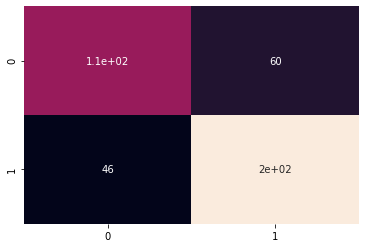

In [42]:
# Creating Heat Map
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
test_pred = knn.predict(test_features)
cm = confusion_matrix(test_labels, test_pred)
sns.heatmap(cm, cbar=False, annot=True)
plt.show()

In [43]:
# Classification Report 
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       166
           1       0.77      0.82      0.79       250

    accuracy                           0.75       416
   macro avg       0.74      0.73      0.73       416
weighted avg       0.74      0.75      0.74       416



# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

Cs = [0.01, 0.1, 1, 10, 100]
train_acc = []
test_acc = []

for C in Cs:
    logreg = LogisticRegression(C=C, max_iter=500)
    logreg.fit(train_features, train_labels)
    
#   recording accuracy 
    train_acc.append(logreg.score(train_features, train_labels))
    test_acc.append(logreg.score(test_features, test_labels))

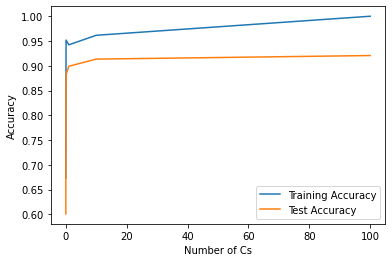

In [47]:
# Plotting Best C

plt.plot(Cs, train_acc, label="Training Accuracy")
plt.plot(Cs, test_acc, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Cs")
plt.legend()
plt.savefig('compare-imgs\\logreg_compare_model')

In [48]:
# From Above, 10 Cs Provide Best Training and Testing Accuracy

logreg = LogisticRegression(C=10, max_iter=500)
logreg.fit(train_features, train_labels)
train_score = logreg.score(train_features, train_labels) * 100
test_score = logreg.score(test_features, test_labels) * 100

print(f"Model Accuracy on Training Set : {str(train_score)[:5]}%")
print(f"Model Accuracy on Testing Set : {str(test_score)[:5]}%")

best_test_accuracy.append(test_score)

Model Accuracy on Training Set : 96.15%
Model Accuracy on Testing Set : 91.34%


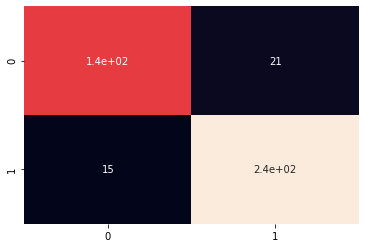

In [49]:
test_pred = logreg.predict(test_features)
cm = confusion_matrix(test_labels, test_pred)
sns.heatmap(cm, cbar=False, annot=True)

plt.show()

In [50]:
# Classification Report
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       166
           1       0.92      0.94      0.93       250

    accuracy                           0.91       416
   macro avg       0.91      0.91      0.91       416
weighted avg       0.91      0.91      0.91       416



# Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

train_acc = []
test_acc = []

# Running Decision Tree on Default Settings 
tree = DecisionTreeClassifier()
tree.fit(train_features, train_labels)
train_acc.append(tree.score(train_features, train_labels))
test_acc.append(tree.score(test_features, test_labels))

print("On Default Settings")
print(f'Training Accuracy : {str(train_acc[0]*100)[:5]}%')
print(f'Testing Accuracy : {str(test_acc[0]*100)[:5]}%')

On Default Settings
Training Accuracy : 100.0%
Testing Accuracy : 89.90%


In [52]:
# Limiting Maximum Depth of the Tree
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(train_features, train_labels)
train_acc.append(tree.score(train_features, train_labels))
test_acc.append(tree.score(test_features, test_labels))
test_score = tree.score(test_features, test_labels) * 100

print("On Limiting Max Depth")
print(f'Training Accuracy : {str(train_acc[1]*100)[:5]}%')
print(f'Testing Accuracy : {str(test_acc[1]*100)[:5]}%')

best_test_accuracy.append(test_score)

On Limiting Max Depth
Training Accuracy : 98.07%
Testing Accuracy : 88.94%


On Limiting the Depth of the Tree, the training accuracy drops, however testing accuracy improve.
Hence, we will use Max Depth of 5 Layers

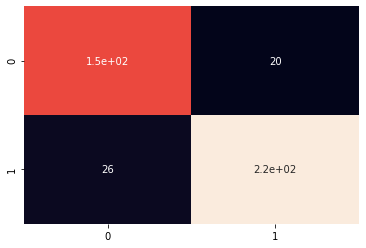

In [53]:
# Plotting Confusion Matrix
test_pred = tree.predict(test_features)
cm = confusion_matrix(test_labels, test_pred)
sns.heatmap(cm, cbar=False, annot=True)

plt.show()

In [54]:
# Classification Report
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       166
           1       0.92      0.90      0.91       250

    accuracy                           0.89       416
   macro avg       0.88      0.89      0.89       416
weighted avg       0.89      0.89      0.89       416



# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

estimators = [10, 20, 30, 50, 100, 200]
train_acc = []
test_acc = []

for estimator in estimators:
    rf = RandomForestClassifier(n_estimators=estimator)
    rf.fit(train_features, train_labels)
    
    train_acc.append(rf.score(train_features, train_labels))
    test_acc.append(rf.score(test_features, test_labels))

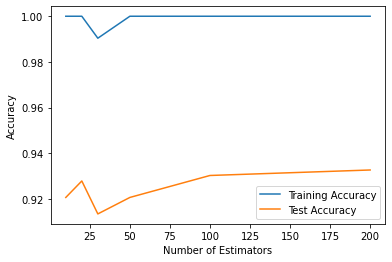

In [56]:
# Plotting Best Estimator

plt.plot(estimators, train_acc, label="Training Accuracy")
plt.plot(estimators, test_acc, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Estimators")
plt.legend()
plt.savefig('compare-imgs\\rf_compare_model')

### 10 Estimators gives the best accuracy on test set

In [22]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(train_features, train_labels)

train_score = rf.score(train_features, train_labels) * 100
test_score = rf.score(test_features, test_labels) * 100

print(f"Model Accuracy on Training Set : {str(train_score)[:5]}%")
print(f"Model Accuracy on Testing Set : {str(test_score)[:5]}%")

best_test_accuracy.append(test_score)

Model Accuracy on Training Set : 100.0%
Model Accuracy on Testing Set : 95.38%


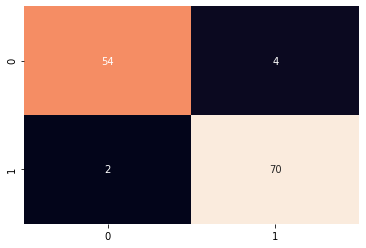

In [23]:
test_pred = rf.predict(test_features)
cm = confusion_matrix(test_labels, test_pred)
sns.heatmap(cm, cbar=False, annot=True)

plt.show()

In [24]:
# Classification Report
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.95      0.97      0.96        72

    accuracy                           0.95       130
   macro avg       0.96      0.95      0.95       130
weighted avg       0.95      0.95      0.95       130



# Support Vector Machine

In [25]:
from sklearn.svm import SVC

Cs = [1, 10, 100, 1000]
train_acc = []
test_acc = []

for C in Cs:
    svm = SVC(C=C)
    svm.fit(train_features, train_labels)

    train_acc.append(svm.score(train_features, train_labels))
    test_acc.append(svm.score(test_features, test_labels))


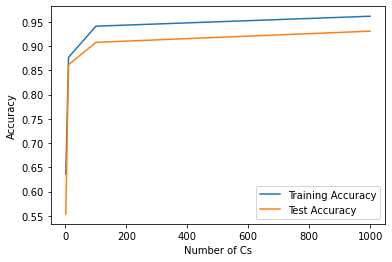

In [26]:
# Plotting Best C

plt.plot(Cs, train_acc, label="Training Accuracy")
plt.plot(Cs, test_acc, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Cs")
plt.legend()
plt.savefig('compare-imgs\\svm_compare_model')

### 1000 Cs are the best fit for the model

In [27]:
svm = SVC(C=1000)
svm.fit(train_features, train_labels)

train_score = svm.score(train_features, train_labels) * 100
test_score = svm.score(test_features, test_labels) * 100

print(f"Model Accuracy on Training Set : {str(train_score)[:5]}%")
print(f"Model Accuracy on Testing Set : {str(test_score)[:5]}%")

best_test_accuracy.append(test_score)

Model Accuracy on Training Set : 96.15%
Model Accuracy on Testing Set : 93.07%


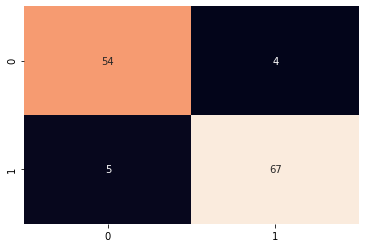

In [28]:
# Plotting Confusion Matrix
test_pred = svm.predict(test_features)
cm = confusion_matrix(test_labels, test_pred)
sns.heatmap(cm, cbar=False, annot=True)

plt.show()

In [29]:
# Classification Report
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        58
           1       0.94      0.93      0.94        72

    accuracy                           0.93       130
   macro avg       0.93      0.93      0.93       130
weighted avg       0.93      0.93      0.93       130



### Plotting and Analyzing Best Model

Text(0, 0.5, 'Best Accuracy')

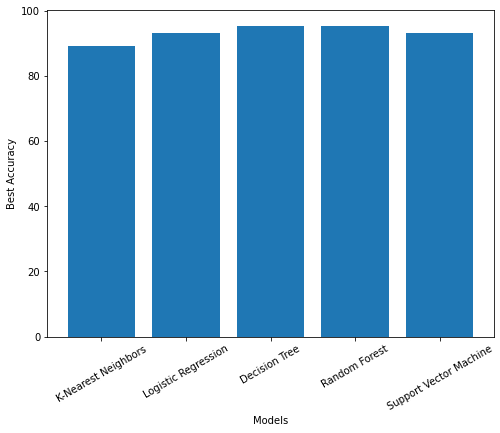

In [30]:
plt.figure(figsize=(8,6))
plt.bar(models, best_test_accuracy, align='center')
plt.xlabel("Models")
plt.xticks(rotation=30)
plt.ylabel("Best Accuracy")

### Saving All Models Externally

In [31]:
import joblib

joblib.dump(knn, 'models\\knn_model.pkl')
joblib.dump(logreg, 'models\\logreg_model.pkl')
joblib.dump(tree, 'models\\tree_model.pkl')
joblib.dump(rf, 'models\\rf_model.pkl')
joblib.dump(svm, 'models\\svm_model.pkl')

['models\\svm_model.pkl']